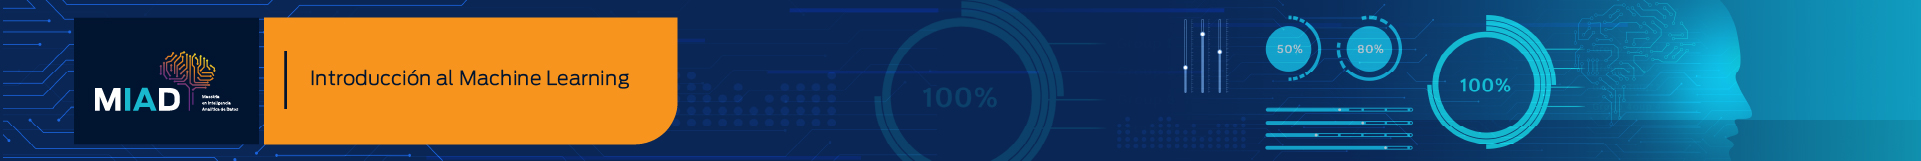

# Introducción al Machine Learning - Semana 6
## Caso: implementación de metodologías de imputación de variables e imbalanceo de clases


### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para gestionar situaciones de datos faltantes e imbalanceo de clases.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Primer conjunto de datos

Utilice el archivo de datos "Missing data.csv" que se encuentra en este repositorio para hacer los siguientes tres puntos:

### 1. Análisis preliminar de variables del primer conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el primer conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

Se importan todos los módulos y funciones necesarias para correr el código

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import seaborn as sns

Se lee el archivo csv con los datos y se convierte en un dataframe de Pandas y se visualizan las primeras filas del archivo

In [61]:
Missing=pd.read_csv("MissingData.csv")
pd.set_option('display.max_columns', None)
Missing.head()

,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,germ,plant.growth,leaves,leaf.halo,leaf.marg,leaf.size,leaf.shread,leaf.malf,leaf.mild,stem,lodging,stem.cankers,canker.lesion,fruiting.bodies,ext.decay,mycelium,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


Se realizan las estadísticas descriptivas de la data por cada una de las columnas del dataframe

In [62]:

desc_stats = Missing.describe()
print("Estadísticas descriptivas:")
print(desc_stats)


Estadísticas descriptivas:
             date  plant.stand      precip        temp        hail  \
count  682.000000   647.000000  645.000000  653.000000  562.000000   
mean     3.554252     0.452859    1.596899    1.182236    0.225979   
std      1.694117     0.498158    0.686147    0.628214    0.418598   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      2.000000     0.000000    1.000000    1.000000    0.000000   
50%      4.000000     0.000000    2.000000    1.000000    0.000000   
75%      5.000000     1.000000    2.000000    2.000000    0.000000   
max      6.000000     1.000000    2.000000    2.000000    1.000000   

        crop.hist    area.dam       sever    seed.tmt        germ  \
count  667.000000  682.000000  562.000000  562.000000  571.000000   
mean     1.884558    1.580645    0.733096    0.519573    1.049037   
std      0.975766    1.074374    0.597028    0.612241    0.790988   
min      0.000000    0.000000    0.000000    0.000000    0.000000 

Se grafican los histogramas de cada una de las variables

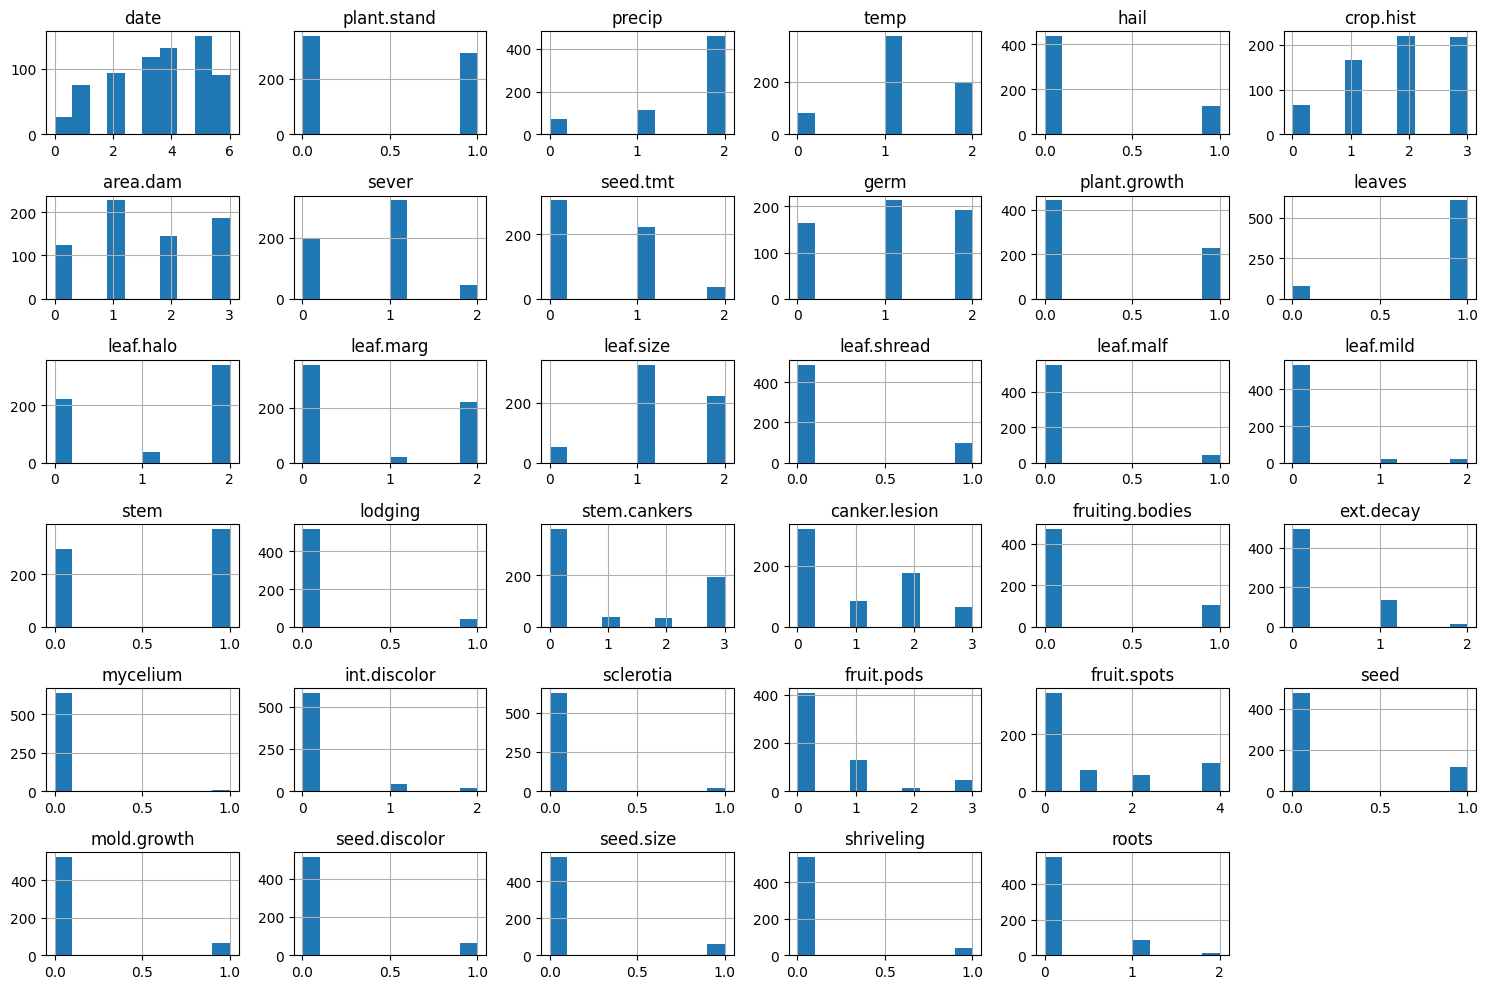

In [63]:
Missing.hist(figsize=(15, 10), bins=10)
plt.tight_layout()
plt.show()

A continuación se visualiza la matriz de correlaciones de cada una de las variables

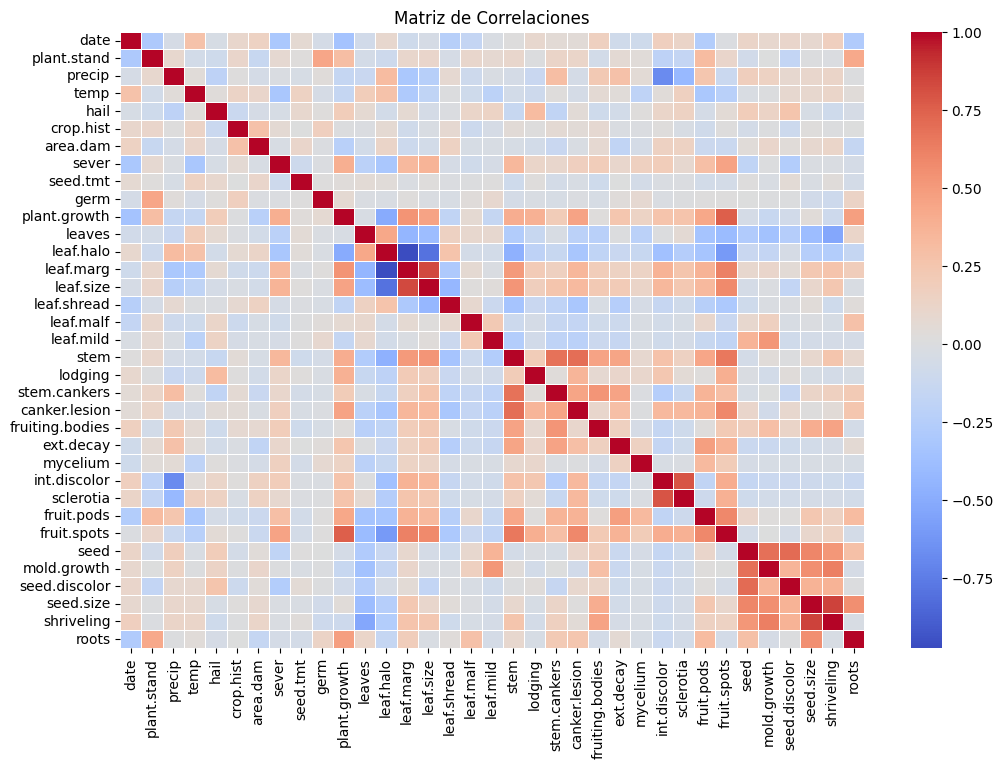

In [64]:
correlation_matrix = Missing.drop(columns=['Class']).corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

Se visualiza la distribución de la variable dependiente Class

Distribución de la variable dependiente Class


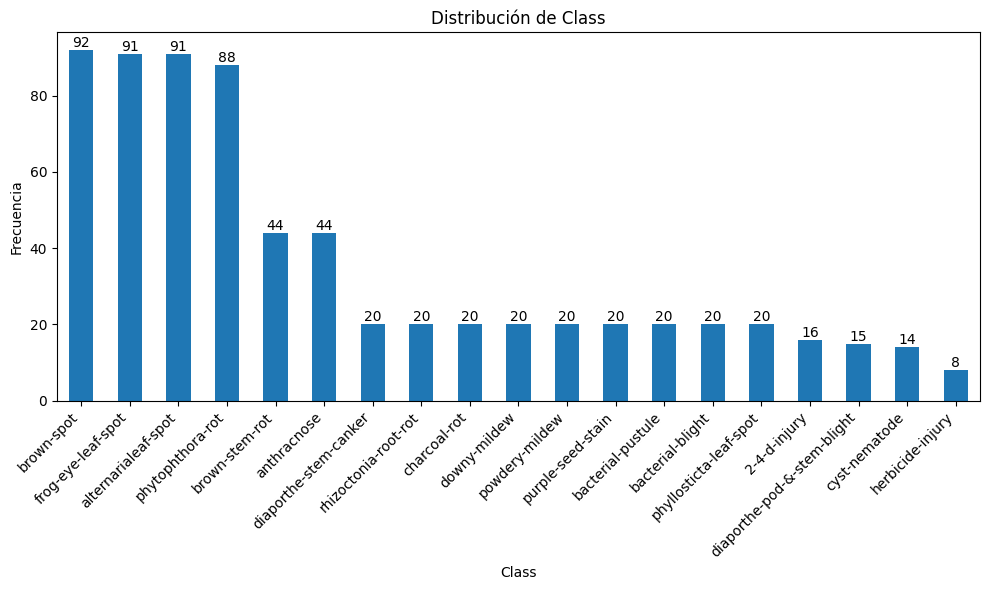

In [65]:
print("Distribución de la variable dependiente Class")

class_counts = Missing['Class'].value_counts()



plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar')


for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                   
        int(bar.get_height()),               
        ha='center',                        
        va='bottom'                          
    )

plt.title("Distribución de Class")
plt.xlabel("Class")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()



Vemos qué cantidad y qué porcentaje de data está faltante en cada una de las variables

In [66]:
missing_data = Missing.isnull().sum()
missing_percentage = (Missing.isnull().sum() / len(Missing)) * 100

# Combine into a single DataFrame
missing_matrix = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage (%)': missing_percentage
})

# Sort by Missing Count (optional, for better readability)
missing_matrix = missing_matrix.sort_values(by='Missing Count', ascending=False)

# Print the combined matrix
print("\nMissing Data Matrix (Count and Percentage):")
print(missing_matrix)

# Optional: Display with better formatting
pd.set_option('display.max_rows', None)  # Show all rows if needed
print(missing_matrix.to_string())



Missing Data Matrix (Count and Percentage):
                 Missing Count  Missing Percentage (%)
lodging                    121               17.715959
seed.tmt                   121               17.715959
sever                      121               17.715959
hail                       121               17.715959
germ                       112               16.398243
leaf.mild                  108               15.812592
fruiting.bodies            106               15.519766
seed.discolor              106               15.519766
fruit.spots                106               15.519766
shriveling                 106               15.519766
leaf.shread                100               14.641288
seed                        92               13.469985
seed.size                   92               13.469985
mold.growth                 92               13.469985
leaf.size                   84               12.298682
leaf.halo                   84               12.298682
fruit.pods          

Observamos de uan manera más visual los datos que están faltantes y su distribución en el dataframe

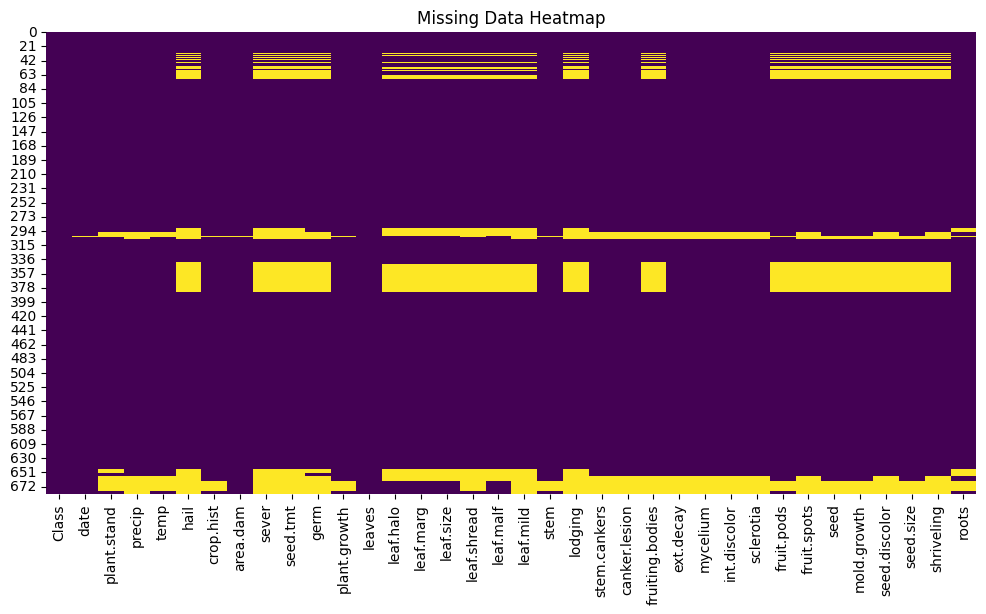

In [67]:

plt.figure(figsize=(12, 6))
sns.heatmap(Missing.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

Omservamos que hay variables con una alta correlación entre sí, como por ejemplo leaf.margen con leaf.halo o seed.size con shriveling. Vemos también que casi todos los datos faltantes están ausentes en las mismas filas y que por lo tanto hay una gran cantidad de filas con todos los datos completos.

### 2. Gestión de datos faltantes (25 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Con la muestra de entrenamiento, realicen un procedimiento de imputación simple multivariada para todas las variables que tengan datos faltantes en sus filas.

In [68]:
XTotal = Missing.loc[:,Missing.columns!="Class"]
yTotal = Missing.loc[:,Missing.columns=="Class"]

particiones correspondientes para que el 80% correspondan al conjunto de entrenamiento y los restantes al conjunto de evaluación

In [69]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

porcentaje = 0.8  # 80% de los datos para entrenamiento

datosTrain = round(len(XTotal) * porcentaje)

XTrain = XTotal.head(datosTrain)
yTrain = yTotal.head(datosTrain)

XTest = XTotal.tail(len(XTotal) - datosTrain)
yTest = yTotal.tail(len(yTotal) - datosTrain)


Consulta de valores faltantes

In [70]:
faltantes = XTotal.isnull().sum()
columnas_con_faltantes = faltantes[faltantes > 0]

print(columnas_con_faltantes)


date                 1
plant.stand         36
precip              38
temp                30
hail               121
crop.hist           16
area.dam             1
sever              121
seed.tmt           121
germ               112
plant.growth        16
leaf.halo           84
leaf.marg           84
leaf.size           84
leaf.shread        100
leaf.malf           84
leaf.mild          108
stem                16
lodging            121
stem.cankers        38
canker.lesion       38
fruiting.bodies    106
ext.decay           38
mycelium            38
int.discolor        38
sclerotia           38
fruit.pods          84
fruit.spots        106
seed                92
mold.growth         92
seed.discolor      106
seed.size           92
shriveling         106
roots               31
dtype: int64


Se aplica el metodo de Imputación multivariada

In [71]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(XTrain)

/home/analiscar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(random_state=0)

Se obtiene la matriz de datos de entrenamiento imputados

In [72]:
XTrainImputado=pd.DataFrame(imp.transform(XTrain))
print(XTrainImputado)

           0         1         2         3         4         5         6   \
0    6.000000  0.000000  2.000000  1.000000  0.000000  1.000000  1.000000   
1    4.000000  0.000000  2.000000  1.000000  0.000000  2.000000  0.000000   
2    3.000000  0.000000  2.000000  1.000000  0.000000  1.000000  0.000000   
3    3.000000  0.000000  2.000000  1.000000  0.000000  1.000000  0.000000   
4    6.000000  0.000000  2.000000  1.000000  0.000000  2.000000  0.000000   
5    5.000000  0.000000  2.000000  1.000000  0.000000  3.000000  0.000000   
6    5.000000  0.000000  2.000000  1.000000  0.000000  2.000000  0.000000   
7    4.000000  0.000000  2.000000  1.000000  1.000000  1.000000  0.000000   
8    6.000000  0.000000  2.000000  1.000000  0.000000  3.000000  0.000000   
9    4.000000  0.000000  2.000000  1.000000  0.000000  2.000000  0.000000   
10   6.000000  0.000000  0.000000  2.000000  0.000000  1.000000  3.000000   
11   4.000000  0.000000  0.000000  1.000000  1.000000  1.000000  3.000000   

Se obtiene la matriz de datos imputados bajo el mismo criterio anterior pero para la matriz de test

In [73]:
XTestImputado=pd.DataFrame(imp.transform(XTest))
print(XTestImputado)

      0         1         2         3         4         5    6         7   \
0    5.0  0.000000  2.000000  2.000000  0.000000  2.000000  2.0  1.000000   
1    6.0  1.000000  2.000000  2.000000  0.000000  2.000000  3.0  1.000000   
2    5.0  1.000000  2.000000  1.000000  0.000000  2.000000  2.0  0.000000   
3    6.0  0.000000  2.000000  1.000000  0.000000  3.000000  3.0  0.000000   
4    5.0  0.000000  2.000000  1.000000  0.000000  2.000000  2.0  0.000000   
5    6.0  0.000000  2.000000  1.000000  0.000000  3.000000  3.0  0.000000   
6    5.0  0.000000  2.000000  1.000000  0.000000  3.000000  0.0  0.000000   
7    5.0  1.000000  2.000000  1.000000  1.000000  0.000000  0.0  1.000000   
8    5.0  1.000000  2.000000  1.000000  1.000000  1.000000  1.0  1.000000   
9    4.0  0.000000  2.000000  1.000000  1.000000  0.000000  0.0  1.000000   
10   6.0  1.000000  1.000000  2.000000  1.000000  1.000000  1.0  0.000000   
11   4.0  1.000000  2.000000  1.000000  0.000000  2.000000  2.0  0.000000   

(Utilice este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Estimación de modelo de clasificación (10 puntos)
Escojan un modelo de clasificación de los vistos en la semana 3 del curso e impleméntenlo. Evalúen su poder predictivo en la muestra de evaluación debidamente transformada, de acuerdo a la imputación hecha en el conjunto entrenamiento.

In [74]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

yTest_binary = np.where(yTest == 'Up', 1, 0)
nbc_model = GaussianNB()
nbc_model.fit(XTrainImputado, yTrain)
yPred_nbc = nbc_model.predict(XTestImputado)
y_prob_nbc = nbc_model.predict_proba(XTestImputado)[:, 1]



/home/analiscar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
accuracy_nbc = accuracy_score(yTest, yPred_nbc)
conf_matrix_nbc = confusion_matrix(yTest, yPred_nbc)
classification_rep_nbc = classification_report(yTest, yPred_nbc)

fpr, tpr, _ = roc_curve(yTest_binary, y_prob_nbc)
roc_auc = auc(fpr, tpr)

/home/analiscar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/analiscar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/analiscar/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [76]:
# Mostrar métricas de evaluación
print(f'Exactitud (Accuracy) del modelo Naïve Bayes: {accuracy_nbc:.4f}\n')

print('Matriz de Confusión:')
print(conf_matrix_nbc)

print('\nReporte de Clasificación:')
print(classification_rep_nbc)


Exactitud (Accuracy) del modelo Naïve Bayes: 0.7737

Matriz de Confusión:
[[ 2  0  0  0  0  0  0  0 13]
 [ 0 48  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0]
 [ 0  6  5  0  0 35  0  5  0]
 [ 0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]

Reporte de Clasificación:
                             precision    recall  f1-score   support

               2-4-d-injury       1.00      0.13      0.24        15
        alternarialeaf-spot       0.89      0.96      0.92        50
                 brown-spot       0.00      0.00      0.00         0
              cyst-nematode       1.00      1.00      1.00         8
diaporthe-pod-&-stem-blight       1.00      1.00      1.00         9
         frog-eye-leaf-spot       1.00      0.69      0.81        51
           herbicide-injury       1.00      1.00      1.00         4
     phyllosticta-leaf-spot       0.00      0.00      0.00         0
      

El modelo de clasificación presenta un desempeño general aceptable, con una precisión ponderada de 0.96 y un recall ponderado de 0.77, lo que indica que la mayoría de las predicciones son correctas. Sin embargo, hay desafíos importantes que limitan su efectividad:

**Problema de clases no detectadas:** Algunas clases, como brown-spot y phyllosticta-leaf-spot, no son predichas en absoluto (recall = 0), lo que sugiere un fuerte desbalance de datos o que el modelo no ha aprendido bien las características de estas categorías.

**Desequilibrio en el rendimiento entre clases:** Mientras que algunas clases tienen alta precisión pero bajo recall (como 2-4-d-injury con precisión 1.00 y recall 0.13), otras presentan un mejor equilibrio pero siguen teniendo margen de mejora.

**Posible sesgo debido a datos desbalanceados:** El peso de las clases más representadas puede estar afectando la capacidad del modelo para identificar correctamente las clases menos frecuentes.

### Segundo conjunto de datos

Para los siguientes cinco puntos, utilice la base de datos "raw_df" que tiene información sobre tarjetas de crédito y se descarga con las siguientes líneas de código:

In [77]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 4. Análisis preliminar de variables del segundo conjunto de datos (5 puntos)

Realicen un análisis preliminar de los predictores y de la variable de respuesta para el segundo conjunto de datos (correlogramas, histogramas y estadísticas descriptivas).

In [78]:
desc_stats = raw_df.describe()
print("Estadísticas descriptivas:")
print(desc_stats)


Estadísticas descriptivas:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247

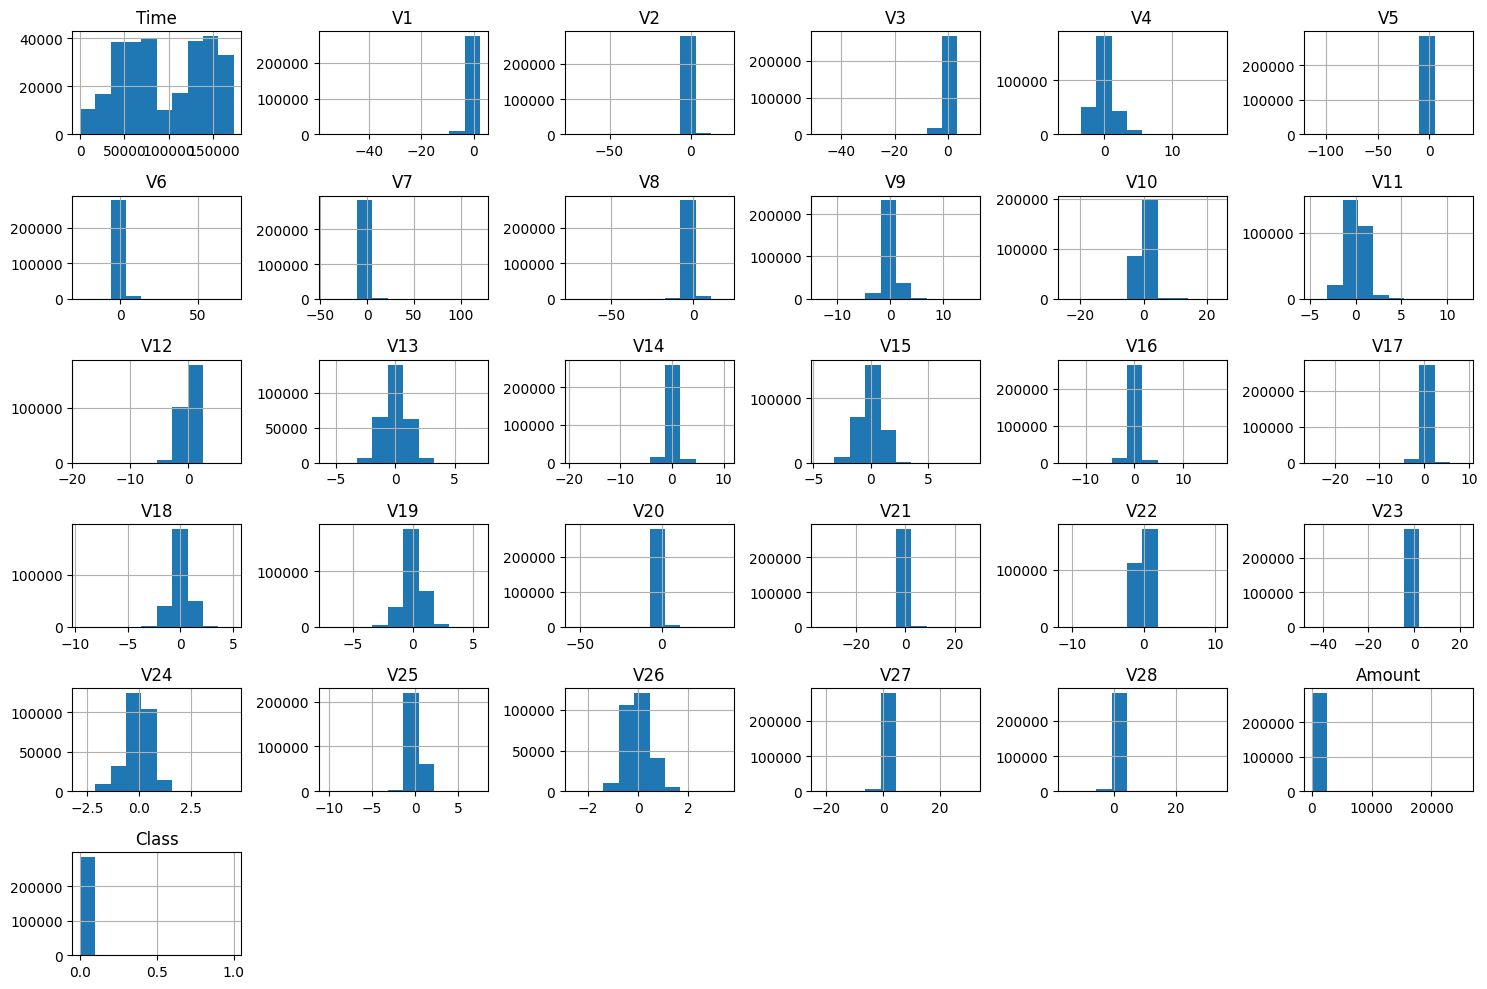

In [79]:
raw_df.hist(figsize=(15, 10), bins=10)
plt.tight_layout()
plt.show()

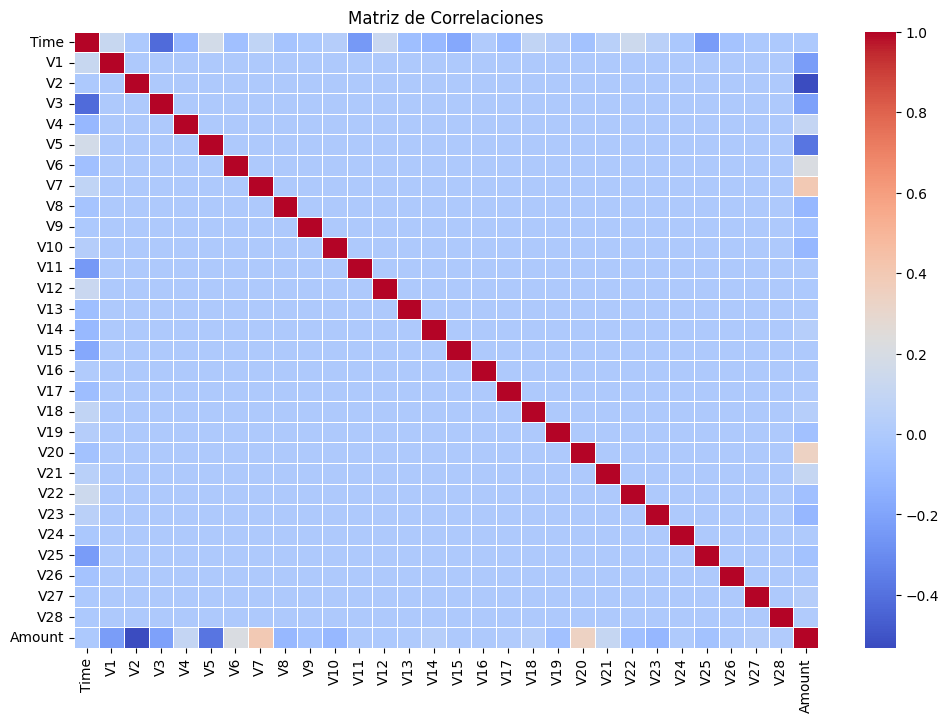

In [80]:
correlation_matrix = raw_df.drop(columns=['Class']).corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

Distribución de la variable dependiente Class


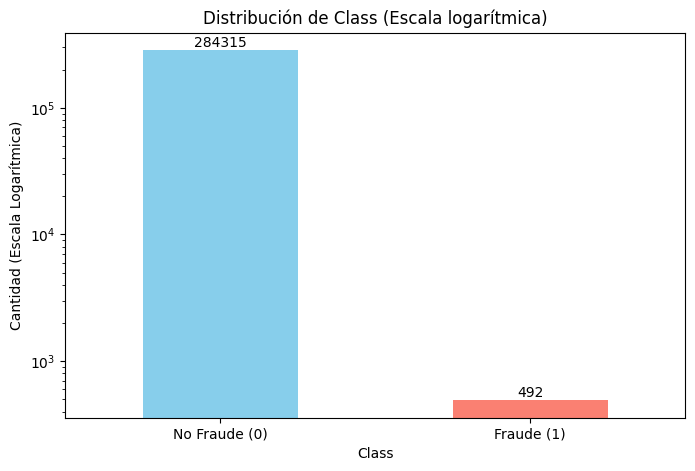

Porcentaje de la Clase 1 (Fraude): 0.1727%


In [81]:
print("Distribución de la variable dependiente Class")

class_counts = raw_df['Class'].value_counts()



plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', logy=True, color=['skyblue', 'salmon'])
plt.title("Distribución de Class (Escala logarítmica)")
plt.xlabel("Class")
plt.ylabel("Cantidad (Escala Logarítmica)")
plt.xticks([0, 1], ['No Fraude (0)', 'Fraude (1)'], rotation=0)
for i, v in enumerate(class_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

print(f"Porcentaje de la Clase 1 (Fraude): {(class_counts[1] / len(raw_df)) * 100:.4f}%")

A continuación vemos gráficas de violín para cada una de las variables dependientes por cada clase

Number of independent variables: 30
Independent variables: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


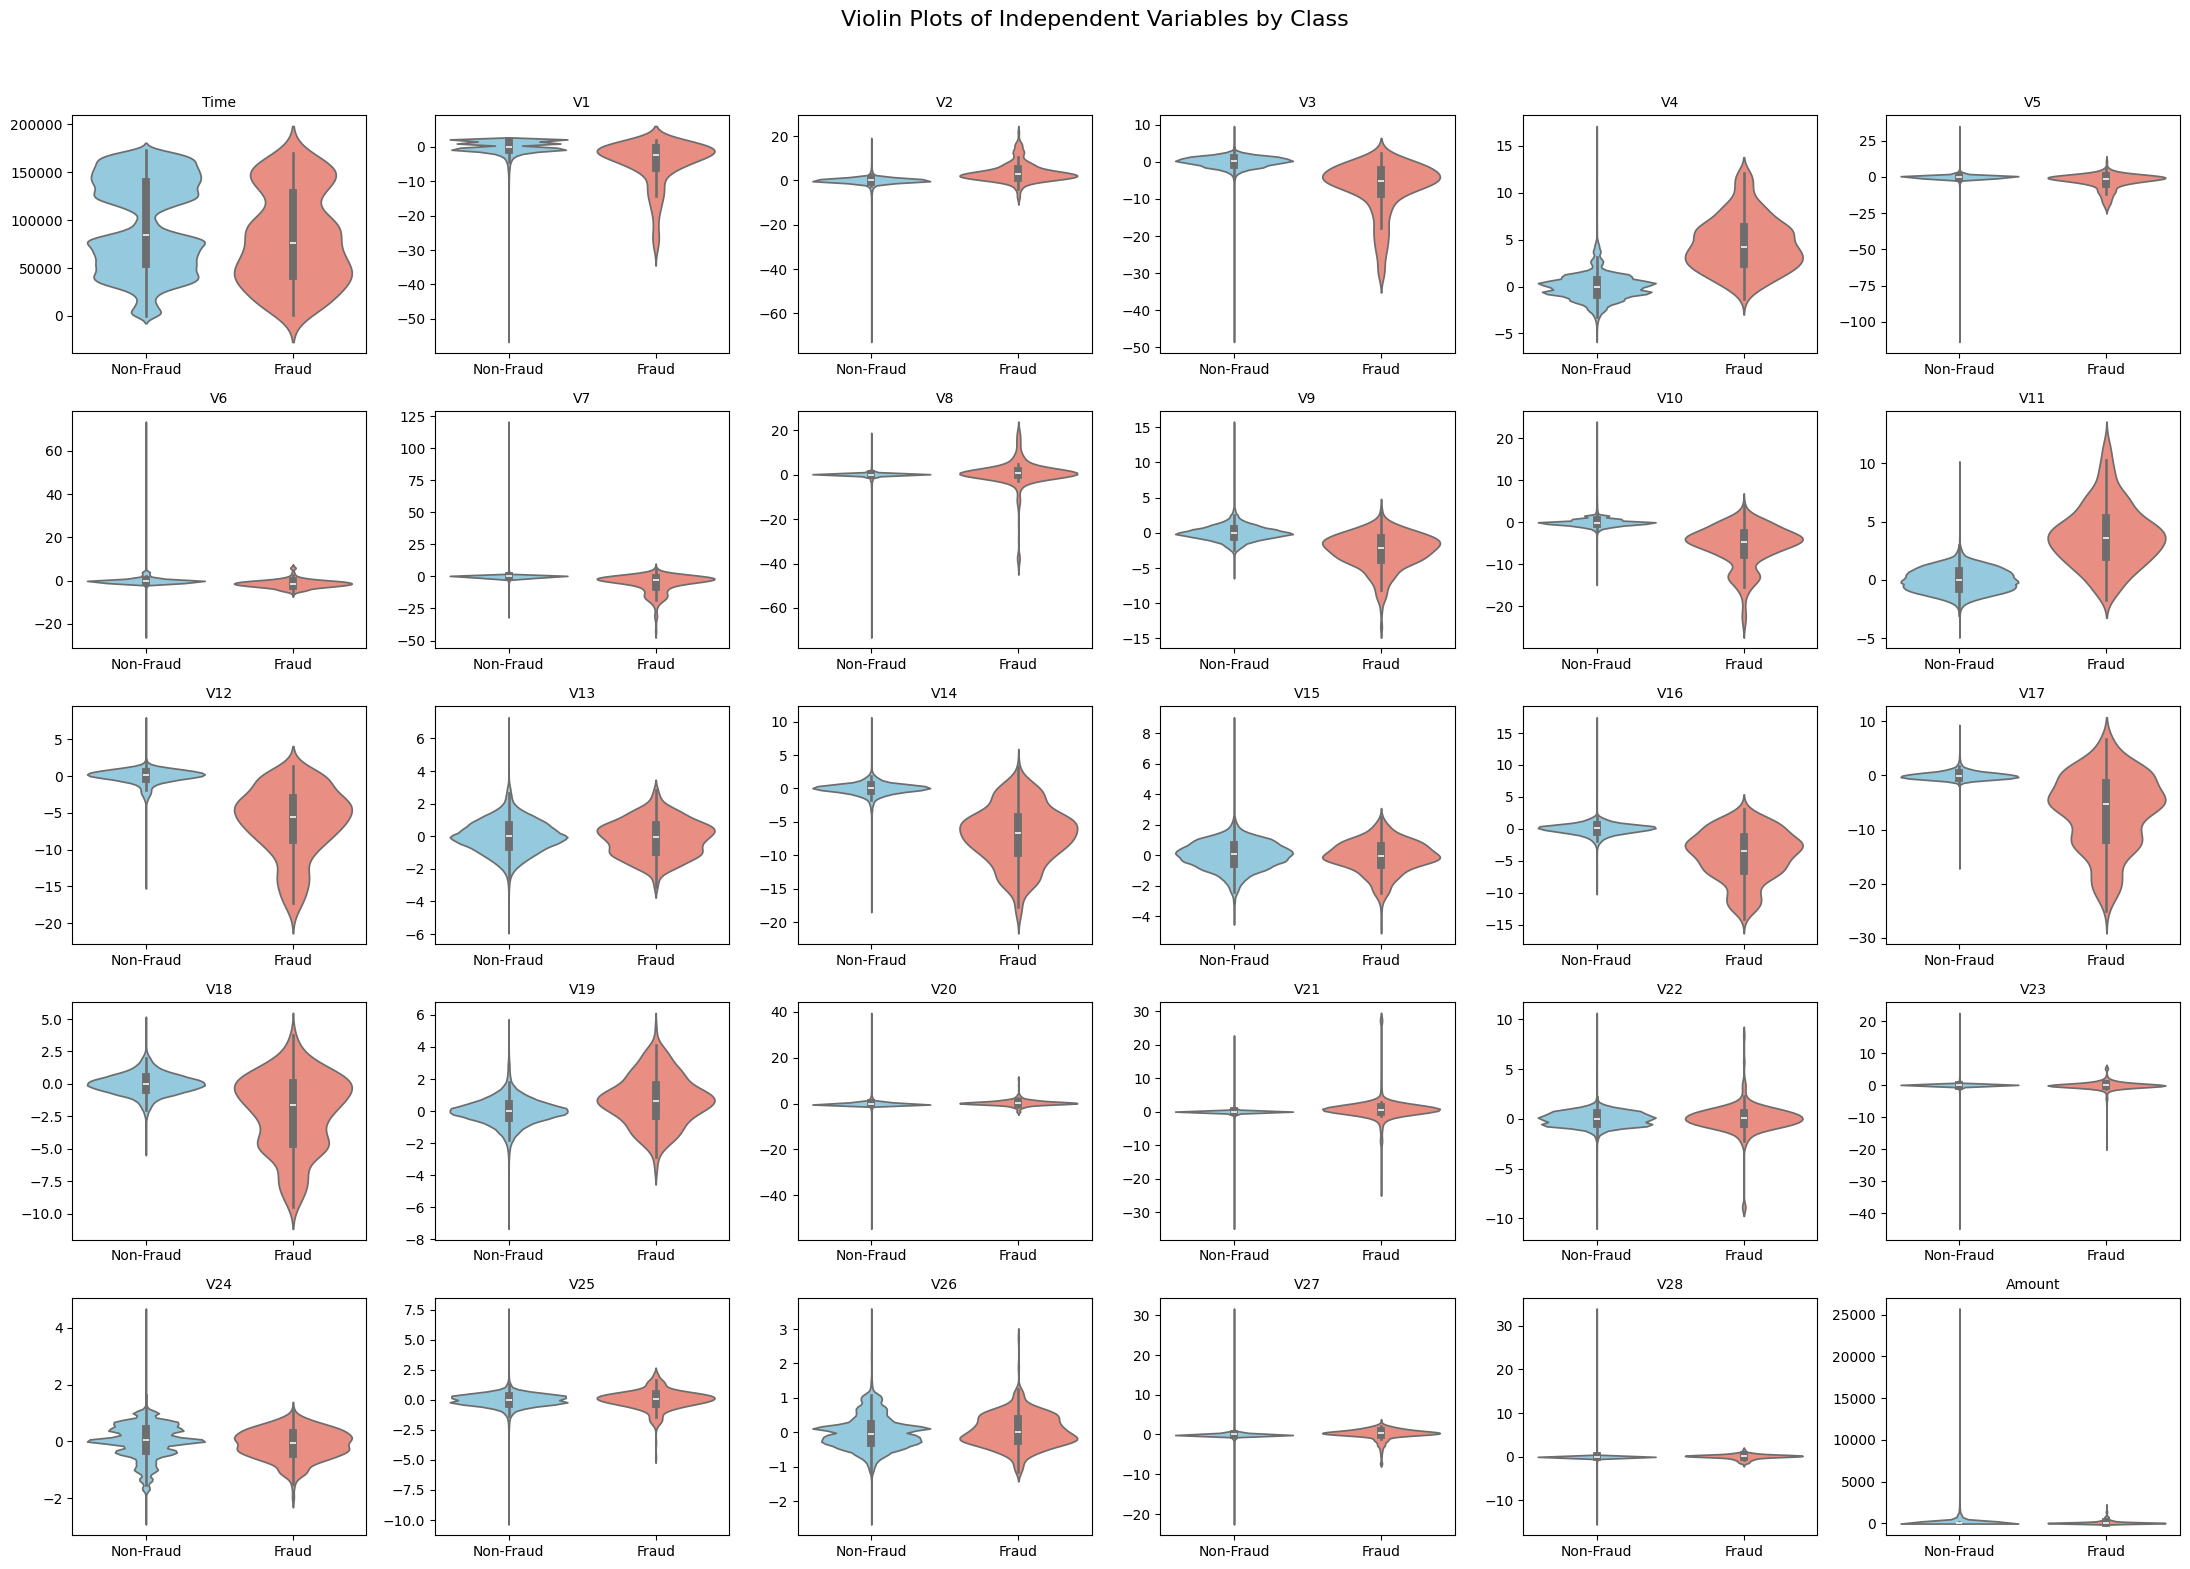

In [82]:
independent_vars = [col for col in raw_df.columns if col != 'Class']
print(f"Number of independent variables: {len(independent_vars)}")
print("Independent variables:", independent_vars)

# Set up the figure and subplots (6 rows, 6 columns for 36 subplots)
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(22, 18))
fig.suptitle("Violin Plots of Independent Variables by Class", fontsize=16, y=1.02)

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each independent variable and create a violin plot
for i, var in enumerate(independent_vars):
    sns.violinplot(x='Class', y=var, hue='Class', data=raw_df, ax=axes[i], 
                   palette=['skyblue', 'salmon'], legend=False)
    axes[i].set_title(var, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticks([0, 1], ['Non-Fraud', 'Fraud'])

# Remove extra subplots (36 - 31 = 5 extras)
for j in range(len(independent_vars), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Vemos gracias a las gráficas de violines que hay variables con comportamientos muy diferentes en cada una de las clases, lo que nos da un buen indicio de que las predicciones pueden ser muy buenas.

### 5. Implementación de QDA (10 puntos)
Realicen una partición de la muestra en un conjunto de entrenamiento y otro de evaluación. Una vez se ha hecho esto, calibren un modelo QDA con la muestra de entrenamiento y evalúen su poder predictivo en la muestra de evaluación.

In [83]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 5)

### 6. Gestión de imbalanceo de clases (25 puntos)
Realicen un procedimiento para gestionar las clases imbalanceadas de la base de datos con el conjunto de entrenamiento. 

In [84]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 6 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 6)

### 7. Implementación de random forest (10 puntos)
Estimen un modelo random forest para predecir la variable de respuesta y midan su desempeño en la muestra de evaluación.

In [85]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 7 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 7)

### 8. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los dos modelos estimados (QDA sin balancear y random forest balanceando) en este caso resulta mejor para la predicción de la variable de respuesta en la segunda base de datos? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 8)